<a href="https://colab.research.google.com/github/AldousSama/Tarea1/blob/main/Tarea_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11490434/11490434 [==============================] - 0s 0us/step
Epoch 1/30
4000/4000 [==============================] - 11s 2ms/step - loss: 1.2434 - accuracy: 0.7226 - val_loss: 0.6878 - val_accuracy: 0.8584
Epoch 2/30
4000/4000 [==============================] - 5s 1ms/step - loss: 0.5675 - accuracy: 0.8699 - val_loss: 0.4595 - val_accuracy: 0.8907
Epoch 3/30
4000/4000 [==============================] - 5s 1ms/step - loss: 0.4314 - accuracy: 0.8914 - val_loss: 0.3809 - val_accuracy: 0.9033
Epoch 4/30
4000/4000 [==============================] - 5s 1ms/step - loss: 0.3734 - accuracy: 0.9015 - val_loss: 0.3408 - val_accuracy: 0.9098
Epoch 5/30
4000/4000 [==============================] - 6s 1ms/step - loss: 0.3400 - accuracy: 0.9081 - val_loss: 0.3146 - val_accuracy: 0.9142
Epoch 6/30
4000/4000 [==============================] - 5s 1ms/step - loss: 0.3172 - accuracy: 0.9124 - val_loss: 0.2973 - val_accuracy: 0.9173
Epoch 7/30
4000/4000 [==============================] - 6s 1ms/step - 

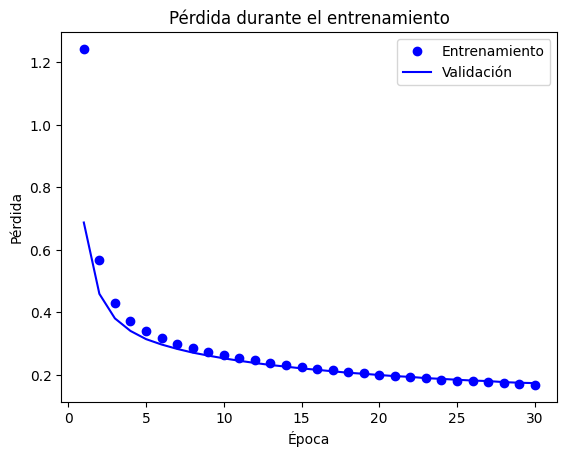

313/313 [==============================] - 0s 1ms/step - loss: 0.1738 - accuracy: 0.9477
Precisión en los datos de prueba: 94.77%


In [1]:
 #Este codigo es una "actualización del anterior solo que implementando keras, por lo que la carga de los datos MNSIT es distinta."
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical
import time  # Importa el módulo time

# Carga los datos MNIST
(training_images, training_labels), (test_images, test_labels) = mnist.load_data()

# Preprocesa los datos
training_images = training_images.reshape((60000, 784))
training_images = training_images.astype('float32') / 255

test_images = test_images.reshape((10000, 784))
test_images = test_images.astype('float32') / 255

training_labels = to_categorical(training_labels)
test_labels = to_categorical(test_labels)

# Cremos el modelo de la red neuronal
model = Sequential()
model.add(Dense(units=30, activation='sigmoid', input_dim=784))
model.add(Dense(units=10, activation='softmax'))

# Aquí lo compilo con crossentropy y el optimizador que había usado
model.compile(loss='categorical_crossentropy', optimizer=SGD(learning_rate=0.01), metrics=['accuracy'])

# Esto es para poder ver cuanto tiempo tarda en entrenar
start_time = time.time()

# Entrena el modelo
history = model.fit(training_images, training_labels, epochs=30, batch_size=15, validation_data=(test_images, test_labels))

# Registra el tiempo de finalización
end_time = time.time()

# Calcula el tiempo de entrenamiento
training_time = end_time - start_time

print(f'Tiempo de entrenamiento: {training_time:.2f} segundos')

# Grafica la historia de la pérdida
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)

plt.plot(epochs, loss, 'bo', label='Entrenamiento')
plt.plot(epochs, val_loss, 'b', label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Época')
plt.ylabel('Pérdida')
plt.legend()
plt.show()

# Calcula la precisión en los datos de prueba
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print(f'Precisión en los datos de prueba: {test_accuracy * 100:.2f}%')
